In [ ]:
# Part 1

In [1]:
# 1 
# Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?
import pandas as pd
import matplotlib.pyplot as plt
df0 = pd.read_csv('states0.csv')
df1 = pd.read_csv('states3.csv')
print(df0)
print("-------------------")
print(df1)

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   
5           5    Colorado   5278906   20.78438003220608%   69.89557165861504%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   
5   3.546376811594

In [2]:
# 2 
# Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.
import glob
files = glob.glob('states*.csv')
data_list = [pd.read_csv(file) for file in files]
us_census = pd.DataFrame(pd.concat(data_list, ignore_index = True),columns =["State","TotalPop","Hispanic","White","Black","Native","Asian","Pacific","Income","GenderPop"])

In [3]:
"""3.
Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?"""
print(us_census.columns)
print("-------------------------")
print(us_census.dtypes)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')
-------------------------
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


In [4]:
"""4.
Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats."""
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [5]:
"""5.
Use regex to turn the Income column into a format that is ready for conversion into a numerical type."""
import re
Format1 = re.compile(r'[^\d\.]')
us_census["Income"] = [Format1.sub("",x) for x in us_census["Income"]]
us_census["Income"]=us_census["Income"].astype(float)
print(us_census["Income"])

0     43296.358603
1     70354.743902
2     54207.820955
3     41935.633968
4     67264.782303
5     64657.801787
6     64657.801787
7     76146.560588
8     61827.976636
9     75466.363636
10    50690.194987
11    50811.082051
12    50811.082051
13    73264.426282
14    48017.315436
15    59587.048875
16    48616.227848
17    53017.753041
18    53017.753041
19    53885.612648
20    45285.802536
21    44957.993761
22    49181.974359
23    78765.400725
24    78765.400725
25    72838.936726
26    51201.830037
27    62820.833959
28    38909.919207
29    49763.987726
30    49763.987726
31    47645.682836
32    55916.469697
33    55526.525074
34    68728.859589
35    76581.083417
36    76581.083417
37    47329.967871
38    64290.749113
39    49937.464137
40    58188.112195
41    49655.248466
42    49655.248466
43    48100.854267
44    54271.901818
45    56170.464510
46    20720.538286
47    59125.270833
48    59125.270833
49    46296.807763
50    51805.405405
51    47328.083617
52    55874.

In [6]:
"""6.
Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results."""
GenderPop_split = us_census.GenderPop.str.split('_')
us_census["Men"] = GenderPop_split.str.get(0)
us_census['Women'] = GenderPop_split.str.get(1)

In [7]:
"""7.
Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert."""
Format2 = re.compile(r'[^\d\.]')
us_census["Men"] = [Format2.sub("",x) for x in us_census["Men"]]
us_census["Women"] = [Format2.sub("",x) for x in us_census["Women"]]
us_census["Men"] = pd.to_numeric(us_census.Men)
us_census["Women"] = pd.to_numeric(us_census.Women)

print(us_census["Men"])
print(us_census["Women"])

0      2341093
1       384160
2      3299088
3      1451913
4     19087135
5      2648667
6      2648667
7      1751607
8       448413
9       306674
10     9600009
11     4883331
12     4883331
13      709871
14      810464
15     6316899
16     3235263
17     1534595
18     1534595
19     1439862
20     2164208
21     2261156
22      650081
23     2872643
24     2872643
25     3249650
26     4861973
27     2692166
28     1451723
29     2964003
30     2964003
31      510163
32      929606
33     1407735
34      653484
35     4343027
36     4343027
37     1032414
38     9541801
39     4795408
40      367963
41     5662893
42     5662893
43     1906944
44     1948453
45     6245344
46     1713860
47      510388
48      510388
49     2322409
50      423477
51     3167756
52    13171316
53     1459229
54     1459229
55      308573
56     4060948
57     3487725
58      913631
59     2851385
Name: Men, dtype: int64
0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19

In [8]:
"""8.
Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!

9.
Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!
"""
Balancing_fig = us_census["TotalPop"] - us_census["Men"]
us_census["Women"] = us_census["Women"].fillna(Balancing_fig)
us_census["Women"]

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [9]:
"""10.
We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there."""
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [10]:
"""11.
Drop those duplicates using the .drop_duplicates() function."""
us_census.drop_duplicates()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615.0
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041.0
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810.0
10,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194987,9600009M_10045763F,9600009,10045763.0


<function matplotlib.pyplot.show(*args, **kw)>

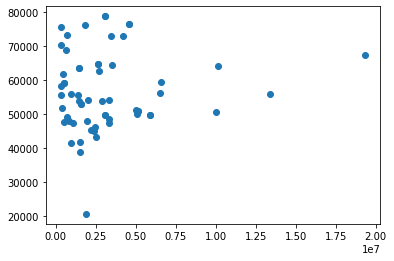

In [11]:
"""12.
Make the scatterplot again. Now, it should be perfect! Your job is secure, for now."""
plt.scatter(us_census["Women"],us_census["Income"])
plt.show

In [12]:
"""Histograms of Races
13.
Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

14.
Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.
"""
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

In [13]:
us_census["Hispanic"] = [Format1.sub("",x) for x in us_census["Hispanic"]]
us_census["White"] = [Format1.sub("",x) for x in us_census["White"]]
us_census["Black"] = [Format1.sub("",x) for x in us_census["Black"]]
us_census["Native"] = [Format1.sub("",x) for x in us_census["Native"]]
us_census["Asian"] = [Format1.sub("",x) for x in us_census["Asian"]]
abc = re.compile(r"[/%]")
us_census["Pacific"] =us_census["Pacific"].str.replace(abc,"").astype(float)
us_census["Hispanic"] = us_census["Hispanic"].astype(float)
us_census["White"] = us_census["White"].astype(float)
us_census["Black"] = us_census["Black"].astype(float)
us_census["Native"] = us_census["Native"].astype(float)
us_census["Asian"] = us_census["Asian"].astype(float)
print(us_census.dtypes) 

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object


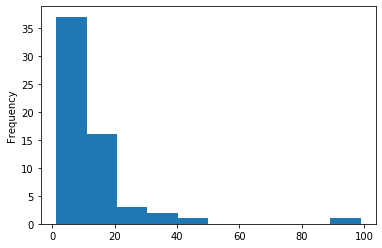

In [14]:
Avg = us_census["Pacific"].mean()
us_census [ "Pacific"] = us_census [ "Pacific"].fillna(Avg)
us_census.duplicated()
us_census.drop_duplicates()
us_census["Hispanic"].plot.hist()
plt.show()

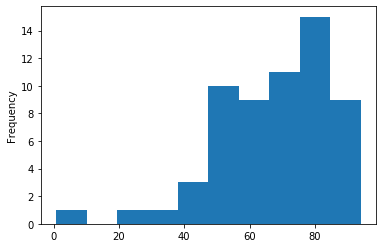

In [15]:
us_census["White"].plot.hist()
plt.show()

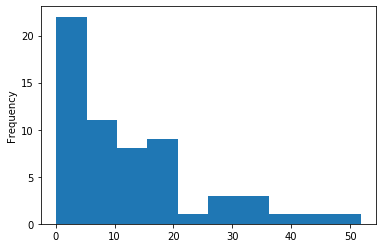

In [16]:
us_census["Black"].plot.hist()
plt.show()

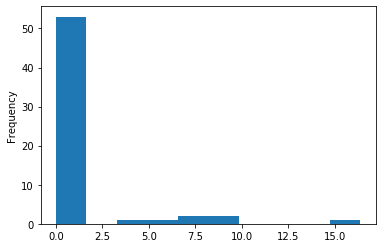

In [17]:
us_census["Native"].plot.hist()
plt.show()

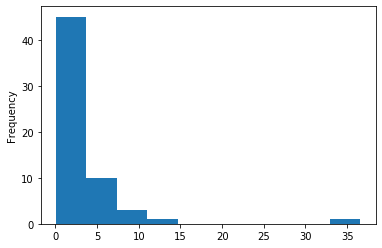

In [18]:
us_census["Asian"].plot.hist()
plt.show()

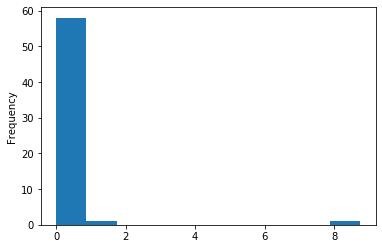

In [19]:
us_census["Pacific"].plot.hist()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

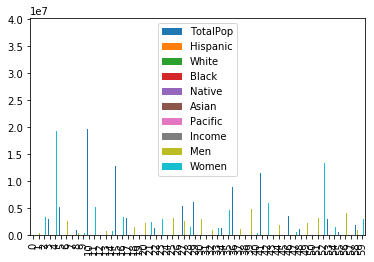

In [20]:
# 15.
# Phew. You’ve definitely impressed your boss on your first day of work.

# But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

# Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

us_census.plot.bar()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

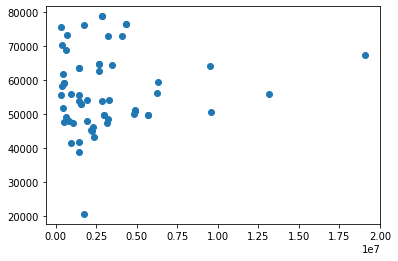

In [21]:
plt.scatter(us_census["Men"],us_census["Income"])
plt.show

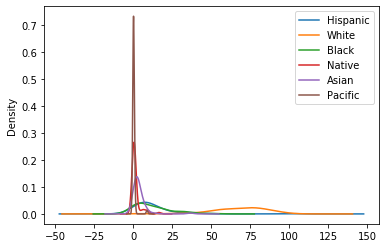

In [24]:
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].plot.density()
plt.show()

In [ ]:
# Task 2

In [25]:
"""1.
Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.
"""
inventory = pd.DataFrame(pd.read_csv('inventory.csv'))
inventory

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [26]:
"""2.
Inspect the first 10 rows of inventory.

3.
The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.
"""
inventory.head(n=10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [27]:
staten_island = pd.DataFrame(inventory.head(n=10))
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [28]:
"""4.
A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.
"""
product_request = staten_island["product_description"]
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [29]:
"""5.
Another customer emails to ask what types of seeds are sold at the Brooklyn location.

Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request"""

filters = (inventory["location"] == "Brooklyn") & (inventory["product_type"] == "seeds")
seed_request = inventory[filters]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [30]:
"""Inventory
6.
Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.
"""
inventory["in_stock"] = inventory["quantity"]>0
inventory

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


In [31]:
"""7.
Petal Power wants to know how valuable their current inventory is.

Create a column called total_value that is equal to price multiplied by quantity.
"""
inventory["total_value"] = inventory["quantity"] * inventory["price"]
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


In [32]:
"""The Marketing department wants a complete description of each product for their catalog.

The following lambda function combines product_type and product_description into a single string:

combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)
Paste this function into script.py."py.
9.
Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product."""

combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)

inventory["full_description"] = inventory.apply(combine_lambda , axis='columns')
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
